In [2]:
import pandas as pd
L_results = []
H_results = []
a_results = []
b_results = []
n_results = []
p_results = []
swith_up_p_results = []
if_mean_results = []
ofh_mean_results = []
ofd_mean_results = []
state_results = []
#iterate over all files
for e in (0.25,0.5,0.75,1.0):
    for f in(0.0,0.25,0.5,0.75,1.0):
        for w in(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0):
            for v in range(0,100):
                filepath = '4/K_3_AGE_L_20_H_20_b_'+ str(e) +'_bool_'+ str(f) + '_n_50_p_1.0_q_1.0_order_1_inputs_1.0_upp_'+ str(w) +'_upr_0.2_i_'+ str(v) +'.txt';
                df = pd.read_csv(filepath,delimiter=' ')
                #Trajectory classes
                ro = df.shape[0]
                state_list = []
                for i in range(0,ro):
                    if df['outputs_fraction_hlt'][i] == 0 and df['outputs_fraction_dis'][i]== 0 :
                        state_list.append('D')
                    elif df['outputs_fraction_hlt'][i] == df['outputs_fraction_dis'][i]:
                        state_list.append('A')
                    elif df['outputs_fraction_dis'][i] == 0:
                        state_list.append('C')
                    else:
                        state_list.append('B')
                s1 = {'A'}
                s2 = {'B'}
                s3 = {'C'}
                s4 = {'D'}
                s5 = {'A','B'}
                s6 = {'A','C'}
                s7 = {'A','D'}
                s8 = {'B','C'}
                s9 = {'B','D'}
                s10 = {'C','D'}
                s11 = {'A','B','C'}
                s12 = {'A','B','D'}
                s13 = {'A','C','D'}
                s14 = {'B','C','D'}
                s15 = {'A','B','C','D'}
                if s1.issubset(state_list) and s14.isdisjoint(state_list):
                    state = 'A'
                elif s2.issubset(state_list) and s13.isdisjoint(state_list):
                    state = 'B'
                elif s3.issubset(state_list) and s12.isdisjoint(state_list): 
                    state = 'C'
                elif s4.issubset(state_list) and s11.isdisjoint(state_list):
                    state = 'D'
                elif s5.issubset(state_list) and s10.isdisjoint(state_list):
                    state = 'AB'
                elif s6.issubset(state_list) and s9.isdisjoint(state_list):
                    state = 'AC'
                elif s7.issubset(state_list) and s8.isdisjoint(state_list):
                    state = 'AD'
                elif s8.issubset(state_list) and s7.isdisjoint(state_list): 
                    state = 'BC'
                elif s9.issubset(state_list) and s6.isdisjoint(state_list):
                     state = 'BD'
                elif s10.issubset(state_list) and s5.isdisjoint(state_list): 
                    state = 'CD'
                elif s11.issubset(state_list) and s4.isdisjoint(state_list):
                    state = 'ABC'
                elif s12.issubset(state_list) and s3.isdisjoint(state_list):
                    state = 'ABD'
                elif s13.issubset(state_list) and s2.isdisjoint(state_list):
                    state = 'ACD'
                elif s14.issubset(state_list) and s1.isdisjoint(state_list):
                    state = 'BCD'
                else:
                    state = 'ABCD'
                #get results of interest:inputs_fraction,outputs_fraction_hlt,outputs_fraction_dis
                [if_mean,ofh_mean,ofd_mean] = df[['inputs_fraction','outputs_fraction_hlt','outputs_fraction_dis']].mean();
                #get Parameters:L,H,a,b,n,p,swith_up_p
                L = df['L'].mean()
                H = df['H'].mean()
                a = df['condition'].mean()
                b = df['b'].mean()
                n = df['n'].mean()
                p = df['p'].mean()
                swith_up_p = float(filepath.split('_')[22])
                L_results.append(L)
                H_results.append(H)
                a_results.append(a)
                b_results.append(b)
                n_results.append(n)
                p_results.append(p)
                swith_up_p_results.append(swith_up_p)
                if_mean_results.append(if_mean)
                ofh_mean_results.append(ofh_mean)
                ofd_mean_results.append(ofd_mean)
                state_results.append(state)
# Generate compacted file              
output = {'L':L_results,'H':H_results,'a':a_results,'b':b_results,'n':n_results,'p':p_results,'swith_up_p':swith_up_p_results,'inputs_fraction':if_mean_results,'outputs_fraction_hlt':ofh_mean_results,'outputs_fraction_dis':ofd_mean_results,'states_fraction':state_results}
test = pd.DataFrame(output)
test.to_csv('4/output.csv',index=0)
print('Done!')

Done!


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
da = pd.read_csv('4/output.csv')
da

,L,H,a,b,n,p,swith_up_p,inputs_fraction,outputs_fraction_hlt,outputs_fraction_dis,states_fraction
0,20.0,20.0,0.0,0.25,50.0,1.0,0.1,0.10160,0.55670,0.39115,ABCD
1,20.0,20.0,0.0,0.25,50.0,1.0,0.1,0.10410,0.55840,0.31710,ABCD
2,20.0,20.0,0.0,0.25,50.0,1.0,0.1,0.09340,0.59405,0.43965,ABCD
3,20.0,20.0,0.0,0.25,50.0,1.0,0.1,0.11210,0.62470,0.34550,ABD
4,20.0,20.0,0.0,0.25,50.0,1.0,0.1,0.10365,0.51010,0.39275,ABCD
...,...,...,...,...,...,...,...,...,...,...,...
19995,20.0,20.0,1.0,1.00,50.0,1.0,1.0,1.00000,1.00000,0.00000,C
19996,20.0,20.0,1.0,1.00,50.0,1.0,1.0,1.00000,1.00000,0.00000,C
19997,20.0,20.0,1.0,1.00,50.0,1.0,1.0,1.00000,1.00000,0.05000,B
19998,20.0,20.0,1.0,1.00,50.0,1.0,1.0,1.00000,1.00000,0.05000,B


In [8]:
# Summarize states_fraction by using PivotTable rules
p1 = pd.pivot_table(da,index = [da.a,da.b,da.swith_up_p], columns = 'states_fraction',aggfunc ='count',values='L',fill_value = 0)
p1.head()
#set(p1.sum('columns'))

states_fraction      A  AB  ABC  ABCD  ABD  AC  ACD  AD   B  BC  BCD  BD  C  \
a   b    swith_up_p                                                           
0.0 0.25 0.1         0   0    0    89   11   0    0   0   0   0    0   0  0   
         0.2         0   0    0    92    7   0    0   0   0   0    1   0  0   
         0.3         0  12   45    37    6   0    0   0   0   0    0   0  0   
         0.4         0  59   19     1    2   0    0   0  19   0    0   0  0   
         0.5         0  42    2     0    0   0    0   0  55   1    0   0  0   

states_fraction      CD  D  
a   b    swith_up_p         
0.0 0.25 0.1          0  0  
         0.2          0  0  
         0.3          0  0  
         0.4          0  0  
         0.5          0  0

In [9]:
# Transform multi index data into columns
p2 = p1.reset_index()
p3 = p2.set_index('swith_up_p')
p3.head()

states_fraction,a,b,A,AB,ABC,ABCD,ABD,AC,ACD,AD,B,BC,BCD,BD,C,CD,D
swith_up_p,,,,,,,,,,,,,,,,,
0.1,0.0,0.25,0,0,0,89,11,0,0,0,0,0,0,0,0,0,0
0.2,0.0,0.25,0,0,0,92,7,0,0,0,0,0,1,0,0,0,0
0.3,0.0,0.25,0,12,45,37,6,0,0,0,0,0,0,0,0,0,0
0.4,0.0,0.25,0,59,19,1,2,0,0,0,19,0,0,0,0,0,0
0.5,0.0,0.25,0,42,2,0,0,0,0,0,55,1,0,0,0,0,0


In [11]:
# Sort data based on different combinations of a and b
q11 = p3.query('a == 0.0 & b == 1.0')
del q11['a'] 
del q11['b']
q11 = q11.div(100)

q21 = p3.query('a == 0.0 & b == 0.75')
del q21['a'] 
del q21['b']
q21 = q21.div(100)

q31 = p3.query('a == 0.0 & b == 0.50') 
del q31['a'] 
del q31['b']
q31 = q31.div(100)

q41 = p3.query('a == 0.0 & b == 0.25') 
del q41['a'] 
del q41['b']
q41 = q41.div(100)

q12 = p3.query('a == 0.25 & b == 1.0') 
del q12['a'] 
del q12['b']
q12 = q12.div(100)

q22 = p3.query('a == 0.25 & b == 0.75') 
del q22['a'] 
del q22['b']
q22 = q22.div(100)

q32 = p3.query('a == 0.25 & b == 0.50') 
del q32['a'] 
del q32['b']
q32 = q32.div(100)

q42 = p3.query('a == 0.25 & b == 0.25') 
del q42['a'] 
del q42['b']
q42 = q42.div(100)

q13 = p3.query('a == 0.5 & b == 1.0') 
del q13['a'] 
del q13['b']
q13 = q13.div(100)

q23 = p3.query('a == 0.5 & b == 0.75') 
del q23['a'] 
del q23['b']
q23 = q23.div(100)

q33 = p3.query('a == 0.5 & b == 0.50') 
del q33['a'] 
del q33['b']
q33 = q33.div(100)

q43 = p3.query('a == 0.5 & b == 0.25') 
del q43['a'] 
del q43['b']
q43 = q43.div(100)

q14 = p3.query('a == 0.75 & b == 1.0') 
del q14['a'] 
del q14['b']
q14 = q14.div(100)

q24 = p3.query('a == 0.75 & b == 0.75') 
del q24['a'] 
del q24['b']
q24 = q24.div(100)

q34 = p3.query('a == 0.75 & b == 0.50') 
del q34['a'] 
del q34['b']
q34 = q34.div(100)

q44 = p3.query('a == 0.75 & b == 0.25') 
del q44['a'] 
del q44['b']
q44 = q44.div(100)

q15 = p3.query('a == 1.0 & b == 1.0') 
del q15['a'] 
del q15['b']
q15 = q15.div(100)

q25 = p3.query('a == 1.0 & b == 0.75') 
del q25['a'] 
del q25['b']
q25 = q25.div(100)

q35 = p3.query('a == 1.0 & b == 0.50') 
del q35['a'] 
del q35['b']
q35 = q35.div(100)

q45 = p3.query('a == 1.0 & b == 0.25') 
del q45['a'] 
del q45['b']
q45 = q45.div(100)

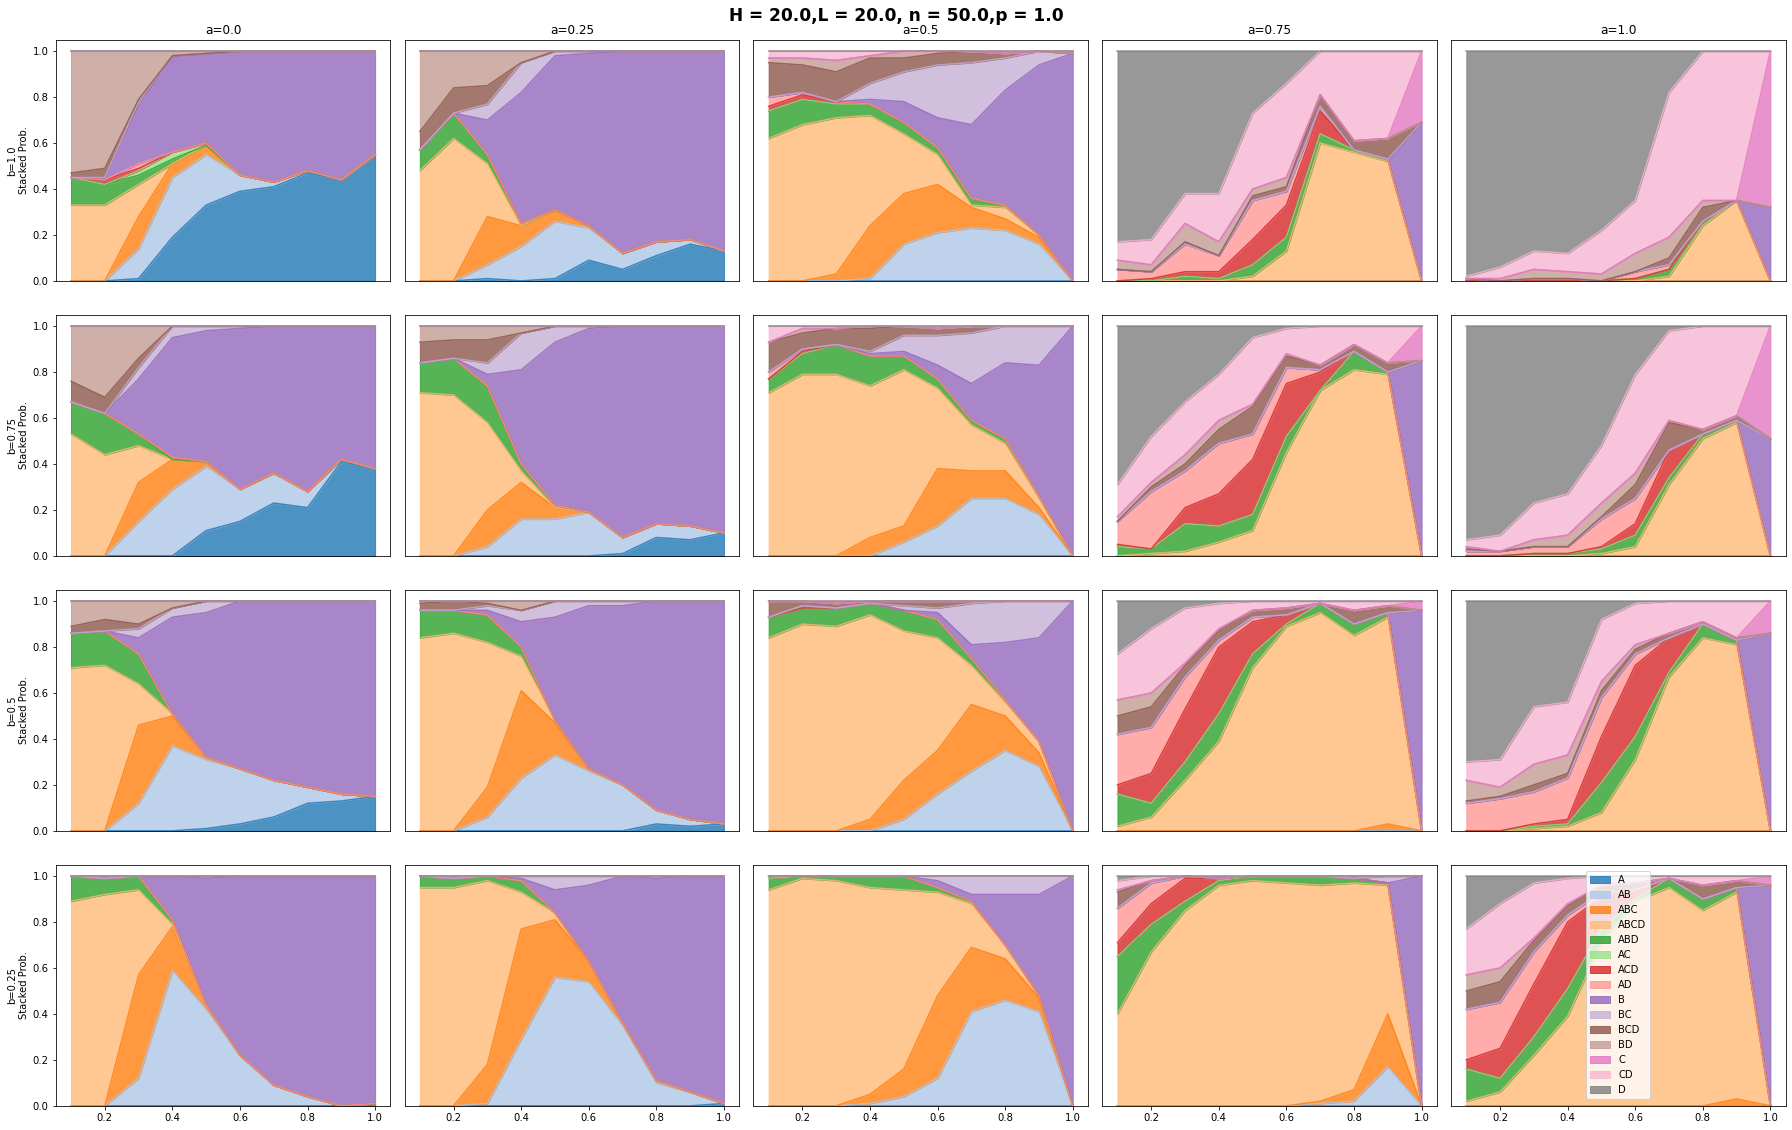

In [12]:
# Generate a 4*5 visual area plot from the sorted data
sns.set_palette("tab20",15)#Set the palette
fig,axes=plt.subplots(4,5,figsize=(25,16)) 

q11.plot.area(stacked=True ,alpha=0.8,ax=axes[0,0],legend=False)
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('b=1.0\nStacked Prob.')
axes[0,0].set_title('a=0.0')
axes[0,0].set_xticks([])

q21.plot.area(stacked=True ,alpha=0.8,ax=axes[1,0],legend=False)
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('b=0.75\nStacked Prob.')
axes[1,0].set_xticks([])

q31.plot.area(stacked=True ,alpha=0.8,ax=axes[2,0],legend=False)
axes[2,0].set_xlabel('')
axes[2,0].set_ylabel('b=0.5\nStacked Prob.')
axes[2,0].set_xticks([])

q41.plot.area(stacked=True ,alpha=0.8,ax=axes[3,0],legend=False)
axes[3,0].set_xlabel('')
axes[3,0].set_ylabel('b=0.25\nStacked Prob.')

q12.plot.area(stacked=True ,alpha=0.8,ax=axes[0,1],legend=False)
axes[0,1].set_xlabel('')
axes[0,1].set_title('a=0.25')
axes[0,1].set_xticks([])
axes[0,1].set_yticks([])

q22.plot.area(stacked=True ,alpha=0.8,ax=axes[1,1],legend=False)
axes[1,1].set_xlabel('')
axes[1,1].set_xticks([])
axes[1,1].set_yticks([])

q32.plot.area(stacked=True ,alpha=0.8,ax=axes[2,1],legend=False)
axes[2,1].set_xlabel('')
axes[2,1].set_xticks([])
axes[2,1].set_yticks([])

q42.plot.area(stacked=True ,alpha=0.8,ax=axes[3,1],legend=False)
axes[3,1].set_xlabel('')
axes[3,1].set_yticks([])

q13.plot.area(stacked=True ,alpha=0.8,ax=axes[0,2],legend=False)
axes[0,2].set_xlabel('')
axes[0,2].set_title('a=0.5')
axes[0,2].set_xticks([])
axes[0,2].set_yticks([])

q23.plot.area(stacked=True ,alpha=0.8,ax=axes[1,2],legend=False)
axes[1,2].set_xlabel('')
axes[1,2].set_xticks([])
axes[1,2].set_yticks([])

q33.plot.area(stacked=True ,alpha=0.8,ax=axes[2,2],legend=False)
axes[2,2].set_xlabel('')
axes[2,2].set_xticks([])
axes[2,2].set_yticks([])

q43.plot.area(stacked=True ,alpha=0.8,ax=axes[3,2],legend=False)
axes[3,2].set_xlabel('')
axes[3,2].set_yticks([])

q14.plot.area(stacked=True ,alpha=0.8,ax=axes[0,3],legend=False)
axes[0,3].set_xlabel('')
axes[0,3].set_title('a=0.75')
axes[0,3].set_xticks([])
axes[0,3].set_yticks([])

q24.plot.area(stacked=True ,alpha=0.8,ax=axes[1,3],legend=False)
axes[1,3].set_xlabel('')
axes[1,3].set_xticks([])
axes[1,3].set_yticks([])

q34.plot.area(stacked=True ,alpha=0.8,ax=axes[2,3],legend=False)
axes[2,3].set_xlabel('')
axes[2,3].set_xticks([])
axes[2,3].set_yticks([])

q44.plot.area(stacked=True ,alpha=0.8,ax=axes[3,3],legend=False)
axes[3,3].set_xlabel('')
axes[3,3].set_yticks([])

q15.plot.area(stacked=True ,alpha=0.8,ax=axes[0,4],legend=False)
axes[0,4].set_title('a=1.0')
axes[0,4].set_xlabel('')
axes[0,4].set_xticks([])
axes[0,4].set_yticks([])

q25.plot.area(stacked=True ,alpha=0.8,ax=axes[1,4],legend=False)
axes[1,4].set_xlabel('')
axes[1,4].set_xticks([])
axes[1,4].set_yticks([])

q35.plot.area(stacked=True ,alpha=0.8,ax=axes[2,4],legend=False)
axes[2,4].set_xlabel('')
axes[2,4].set_xticks([])
axes[2,4].set_yticks([])

q34.plot.area(stacked=True ,alpha=0.8,ax=axes[3,4])
axes[3,4].set_xlabel('')
axes[3,4].set_yticks([])
axes[3,4].legend(loc='center')

plt.suptitle('H = 20.0,L = 20.0, n = 50.0,p = 1.0',fontsize=17,fontweight="bold")
plt.tight_layout()
plt.show()